In [1]:
# import the main frameworks for dealing with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress any warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# import seaborn to help with graphs
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 35) #to display 35 columns
pd.set_option('display.max_rows', 100) #to display 100 rows

In [2]:
# import the categorical data and ensure the import was done properly
categorical_data = pd.read_csv("categorical_data_preprocessed.csv")
categorical_data.head(1)

,customer_id,customer_region,last_promo,payment_method,CUI_American_spend_segment,CUI_Asian_spend_segment,CUI_Beverages_spend_segment,CUI_Cafe_spend_segment,CUI_Chicken Dishes_spend_segment,CUI_Chinese_spend_segment,CUI_Desserts_spend_segment,CUI_Healthy_spend_segment,CUI_Indian_spend_segment,CUI_Italian_spend_segment,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,CUI_Thai_spend_segment,spender_segment,age_group,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,1b8f824d5e,2360,DELIVERY,DIGI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,Mid-High,Teen,1,0,0,0,0,0,1


In [3]:
# import the clustered data and ensure the import was done properly
data = pd.read_csv("data_clustered.csv")
data.head(1)

,customer_id,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders,eco_labels,pref_labels,merged_labels,tsne-2d-one,tsne-2d-two,cluster
0,1b8f824d5e,0.111111,0.2,0.0,0.0,0.316321,0.011236,0.0,0.125,0.0,0.0,0.0,0.0,0.25,0.0,0.416667,0.5,1.0,0.4375,0.159488,0,1,5,-31.315186,-69.049515,5


In [4]:
# make a copy of the data to have the original untouched
df = data.copy()
df.shape

(24053, 26)

In [5]:
# set the customer ids as the index of the dataframe
df = df.set_index("customer_id")
df.head(5)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders,eco_labels,pref_labels,merged_labels,tsne-2d-one,tsne-2d-two,cluster
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.111111,0.2,0.0,0.000000,0.316321,0.011236,0.00,0.125,0.0,0.000,0.000000,0.0,0.25,0.0,0.416667,0.5,1.0000,0.4375,0.159488,0,1,5,-31.315186,-69.049515,5
5d272b9dcb,0.074074,0.4,0.0,0.000000,0.209031,0.011236,0.25,0.125,0.0,0.125,0.111111,0.0,0.00,0.0,0.166667,1.0,1.0000,1.0000,0.104681,2,1,6,15.346068,10.266181,6
f6d1b2ba63,0.851852,0.4,0.0,0.000000,0.097970,0.011236,0.00,0.125,0.0,0.125,0.111111,0.0,0.00,0.0,0.166667,1.0,0.4375,0.4375,0.047948,0,1,5,34.875916,-69.806820,5
180c632ed8,0.407407,0.2,0.0,0.011236,0.346056,0.022472,0.25,0.125,0.0,0.000,0.222222,0.0,0.00,0.0,0.250000,0.5,1.0000,1.0000,0.174677,1,1,4,-17.123571,-53.193930,3
4eb37a6705,0.185185,0.0,0.0,0.011236,0.611006,0.022472,0.25,0.125,0.0,0.250,0.000000,0.0,0.00,0.0,0.416667,0.0,1.0000,1.0000,0.310020,1,1,4,-2.156916,-25.707169,3


In [6]:
# set the customer ids as the index of the dataframe
categorical_data = categorical_data.set_index("customer_id")
categorical_data.head(5)

,customer_region,last_promo,payment_method,CUI_American_spend_segment,CUI_Asian_spend_segment,CUI_Beverages_spend_segment,CUI_Cafe_spend_segment,CUI_Chicken Dishes_spend_segment,CUI_Chinese_spend_segment,CUI_Desserts_spend_segment,CUI_Healthy_spend_segment,CUI_Indian_spend_segment,CUI_Italian_spend_segment,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,CUI_Thai_spend_segment,spender_segment,age_group,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,DELIVERY,DIGI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,Mid-High,Teen,1,0,0,0,0,0,1
5d272b9dcb,8670,DISCOUNT,DIGI,Mid-High,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid-Low,Teen,1,0,0,0,0,0,1
f6d1b2ba63,4660,DISCOUNT,CASH,Mid-Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Adult,1,0,0,0,0,0,1
180c632ed8,4660,DELIVERY,DIGI,NaN,Mid-Low,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,Mid-High,Young Adult,0,1,0,0,0,0,1
4eb37a6705,4660,-,DIGI,Mid-High,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,Teen,0,1,0,0,0,0,1


In [7]:
# remove the outlier indexs from the categorical and leave only the majority class
categorical_df = categorical_data.loc[df.index]
categorical_df.shape

(24053, 27)

In [8]:
# fill "NaN" with None as during import, automatically converted to NaN for cuisine segments
categorical_df.fillna(value="None", inplace=True)

In [9]:
# Define the list of categorical variables to do the profilling
categories = ['spender_segment', 'age_group', 'customer_region', 'last_promo', 'payment_method']

Hours = ['Early_Morning', 'Breakfast', 'Lunch', 'Snack', 'Dinner', 'Late_Night']
Cuisine_SpenderSegment = ['CUI_American_spend_segment', 'CUI_Asian_spend_segment','CUI_Beverages_spend_segment', 'CUI_Cafe_spend_segment',
                          'CUI_Chicken Dishes_spend_segment', 'CUI_Chinese_spend_segment','CUI_Desserts_spend_segment', 'CUI_Healthy_spend_segment',
                          'CUI_Indian_spend_segment', 'CUI_Italian_spend_segment','CUI_Japanese_spend_segment', 'CUI_Noodle Dishes_spend_segment',
                          'CUI_OTHER_spend_segment', 'CUI_Street Food / Snacks_spend_segment','CUI_Thai_spend_segment']
Days = ['DOW_0','DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

In [10]:
# add the cluster assignments to the categorical features
df = pd.concat([categorical_df, df], axis=1)

In [11]:
# convert cluster datatype to ints for readability
df = df.astype({"cluster": int})

In [12]:
df.head()

,customer_region,last_promo,payment_method,CUI_American_spend_segment,CUI_Asian_spend_segment,CUI_Beverages_spend_segment,CUI_Cafe_spend_segment,CUI_Chicken Dishes_spend_segment,CUI_Chinese_spend_segment,CUI_Desserts_spend_segment,CUI_Healthy_spend_segment,CUI_Indian_spend_segment,CUI_Italian_spend_segment,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,...,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders,eco_labels,pref_labels,merged_labels,tsne-2d-one,tsne-2d-two,cluster
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,DELIVERY,DIGI,None,None,None,None,None,None,None,None,High,None,None,None,None,None,...,0.0,0.000,0.000000,0.0,0.25,0.0,0.416667,0.5,1.0000,0.4375,0.159488,0,1,5,-31.315186,-69.049515,5
5d272b9dcb,8670,DISCOUNT,DIGI,Mid-High,Low,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.125,0.111111,0.0,0.00,0.0,0.166667,1.0,1.0000,1.0000,0.104681,2,1,6,15.346068,10.266181,6
f6d1b2ba63,4660,DISCOUNT,CASH,Mid-Low,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.125,0.111111,0.0,0.00,0.0,0.166667,1.0,0.4375,0.4375,0.047948,0,1,5,34.875916,-69.806820,5
180c632ed8,4660,DELIVERY,DIGI,None,Mid-Low,None,None,None,None,None,None,High,None,None,None,None,None,...,0.0,0.000,0.222222,0.0,0.00,0.0,0.250000,0.5,1.0000,1.0000,0.174677,1,1,4,-17.123571,-53.193930,3
4eb37a6705,4660,-,DIGI,Mid-High,High,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.250,0.000000,0.0,0.00,0.0,0.416667,0.0,1.0000,1.0000,0.310020,1,1,4,-2.156916,-25.707169,3


# 1. High-Level Insights

## 1.1. Perspective 1 : Economic Value Segmentation

In order to have the initial high level insights, we start by doing the customer segmentation by economic value. The features that characterize the economic value of each customer are naturally the spender segment and the average spending metrics.

In [13]:
def sns_spender_segment_distribution(df, category_order, title):
    """
    Creates a seaborn barplot for spender segment distribution across clusters.

    Parameters:
        df (DataFrame): The input DataFrame containing 'cluster' and 'spender_segment'.
        category_order (list): Custom order for the spender_segment categories.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Aggregate data and reorder spender_segment categories
    stacked_data = df.groupby(['cluster', 'spender_segment']).size().reset_index(name='Count')
    stacked_data['spender_segment'] = pd.Categorical(stacked_data['spender_segment'], categories=category_order, ordered=True)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=stacked_data, x='cluster', y='Count', hue='spender_segment', hue_order=category_order, palette='coolwarm')

    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.legend(title='Spender Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



#### 1.1.1 Spender Segment

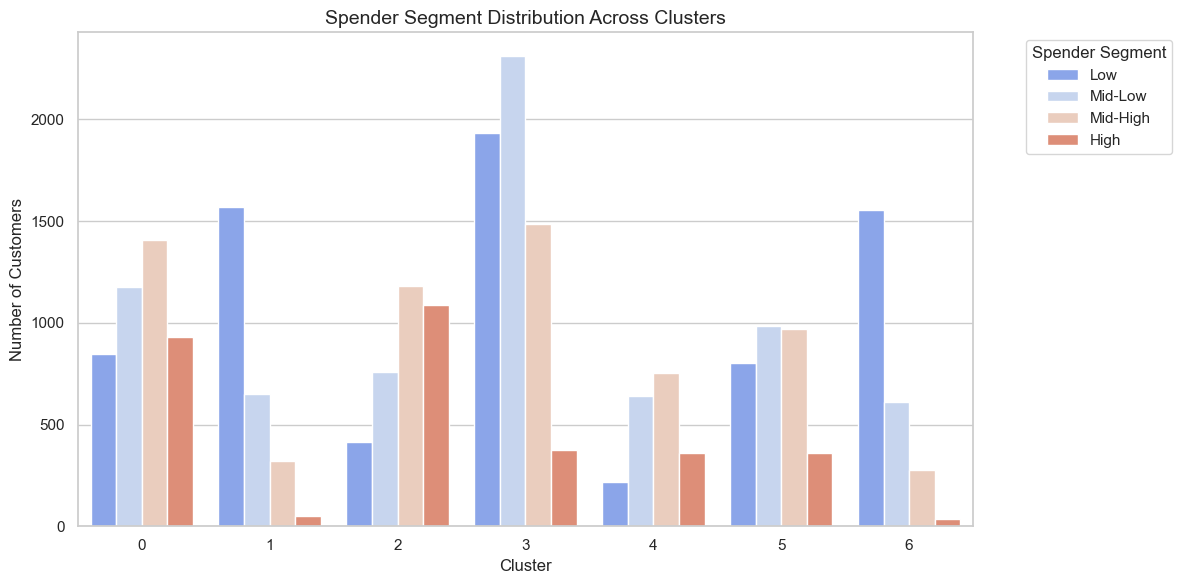

In [14]:
sns_spender_segment_distribution(df, ['Low', 'Mid-Low', 'Mid-High', 'High'], 'Spender Segment Distribution Across Clusters')


- Cluster 1 and 6 are similar in terms of spender segment -> merge

- Cluster 0 and 5 are similar as well in terms of spender segment -> merge 

- Cluster 2 and 4 are similar in terms of spender segment -> merge



#### 1.1.2 Average Spending Metrics

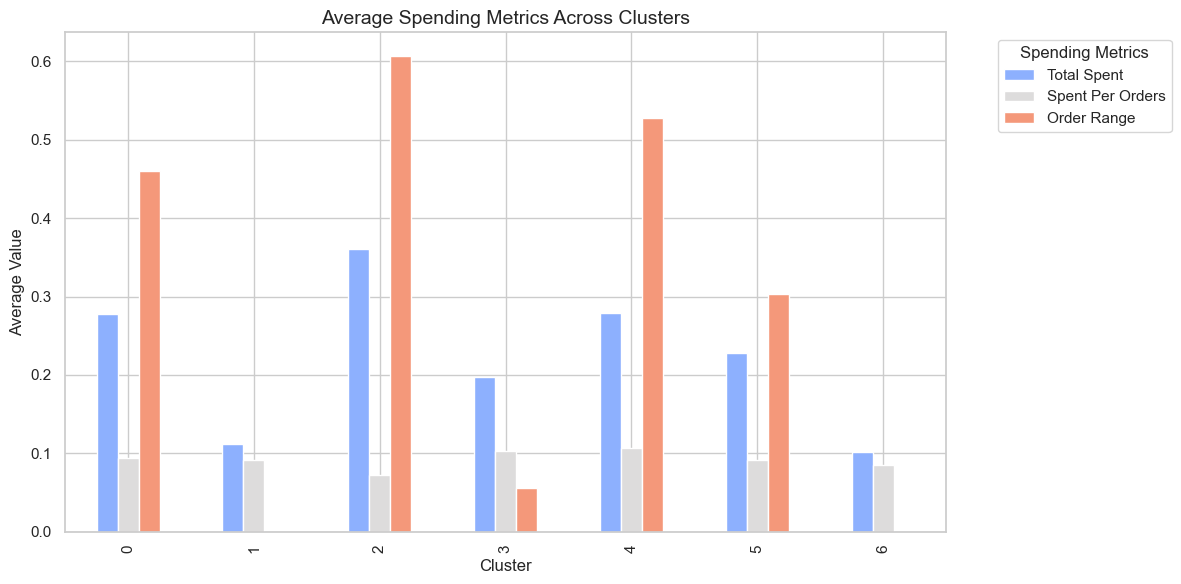

In [15]:
spending_metrics = ['total_spent', 'spent_per_orders', 'order_range']

updated_labels = ['Total Spent', 'Spent Per Orders', 'Order Range']

# Average Spending Metrics Across Clusters with clusters on the X-axis
spending_data = df.groupby('cluster')[spending_metrics].median()

# Define a custom palette for the bar chart
metrics_palette = sns.color_palette("coolwarm", n_colors=len(spending_metrics))

# Plot bar chart with clusters on the X-axis and spending metrics grouped
spending_data.columns = updated_labels  # Rename the columns for the plot
spending_data.plot(kind='bar', figsize=(12, 6), color=metrics_palette)
plt.title('Average Spending Metrics Across Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Spending Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Spender Segment:

- Cluster 1 and 6 are similar in terms of spender segment -> merge

- Cluster 2 should be alone

- Cluster 0 , 4 and 5 are similar.




Spending metrics:

- Cluster 1 and 6 show similar spending metrics -> merge

- Cluster 0 and 5 show similar spending metrics with cluster 0 slightly showing more order range -> merge

- Cluster 2 and 4 show similar spending metrics, with cluster 4 having slightly more spent per orders -> merge

In [16]:
df_economic = df.copy() # create a copy of the dataframe

In [17]:
df["cluster"].value_counts()

cluster
3    6105
0    4359
2    3446
5    3116
1    2583
6    2477
4    1967
Name: count, dtype: int64

In [18]:
# Define the mapping for cluster relabeling
cluster_mapping = {
    1: 1,  
    6: 1,
    3: 2,  
    0: 3,
    4: 3,  
    5: 3,
    2: 4   
}


# Apply the mapping to the 'cluster' column
df_economic['cluster'] = df['cluster'].map(cluster_mapping)

# Verify the updated clusters
print(df_economic['cluster'].value_counts())

cluster
3    9442
2    6105
1    5060
4    3446
Name: count, dtype: int64


### 1.1.3 New cluster solution based in economical value perspective

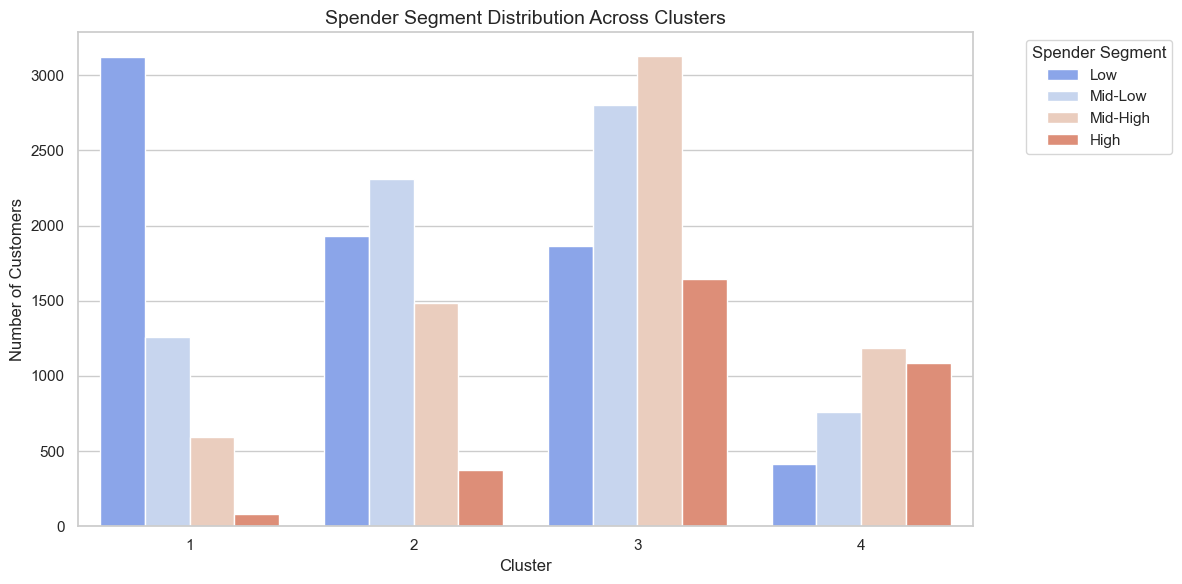

In [19]:
sns_spender_segment_distribution(df_economic, ['Low', 'Mid-Low', 'Mid-High', 'High'], 'Spender Segment Distribution Across Clusters')


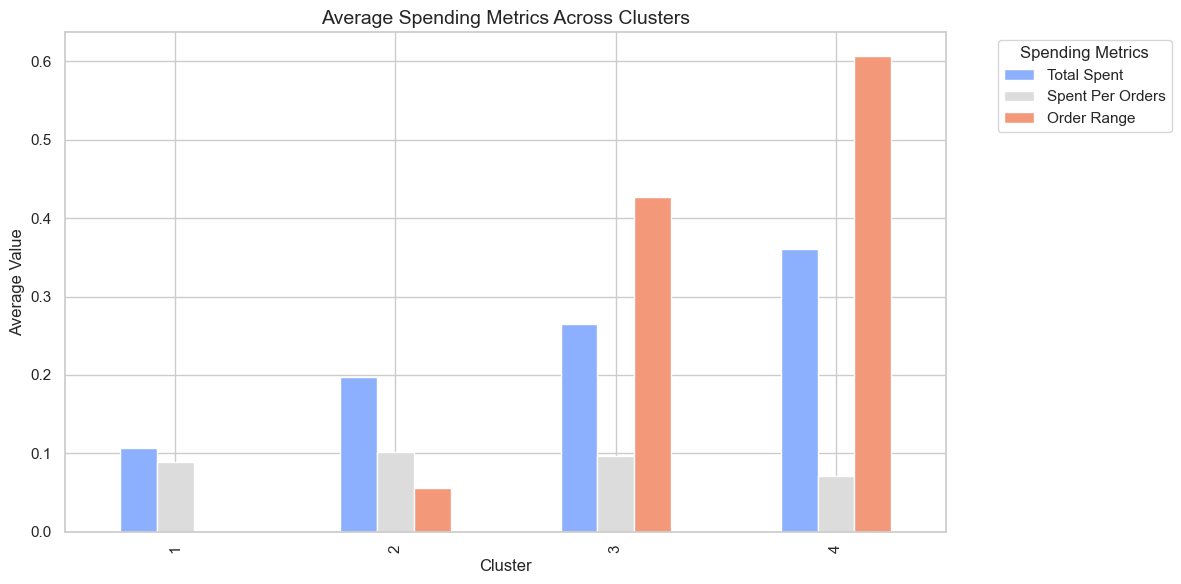

In [20]:
spending_metrics = ['total_spent', 'spent_per_orders', 'order_range']

updated_labels = ['Total Spent', 'Spent Per Orders', 'Order Range']

# Average Spending Metrics Across Clusters with clusters on the X-axis
spending_data = df_economic.groupby('cluster')[spending_metrics].median()

# Define a custom palette for the bar chart
metrics_palette = sns.color_palette("coolwarm", n_colors=len(spending_metrics))

# Plot bar chart with clusters on the X-axis and spending metrics grouped
spending_data.columns = updated_labels  # Rename the columns for the plot
spending_data.plot(kind='bar', figsize=(12, 6), color=metrics_palette)
plt.title('Average Spending Metrics Across Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Spending Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 1.2. Perspective 2 : Behaviour-Based Segmentation

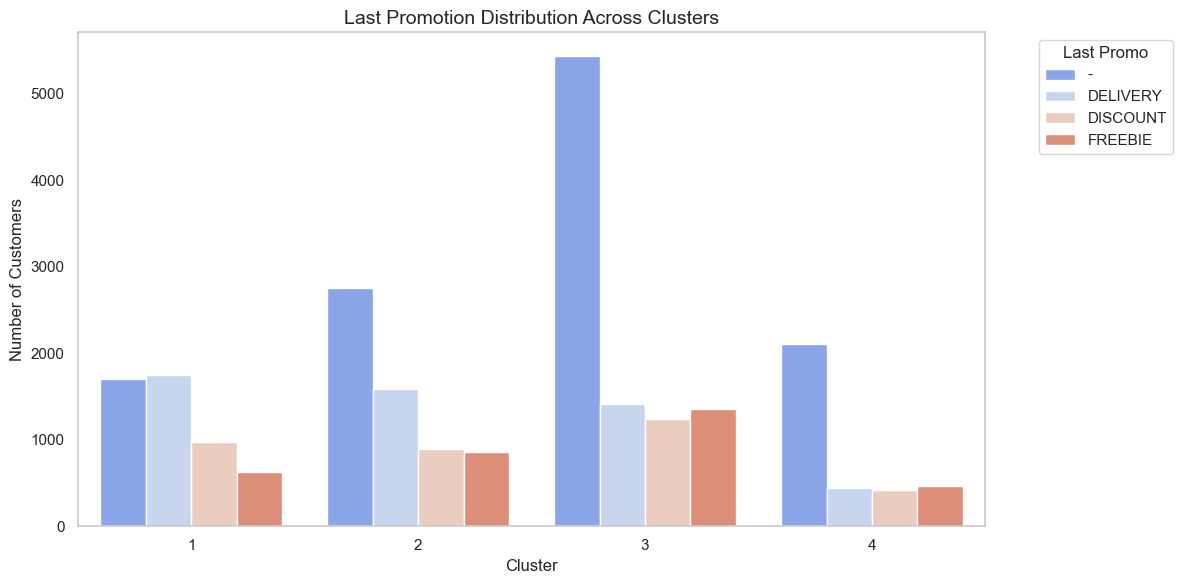

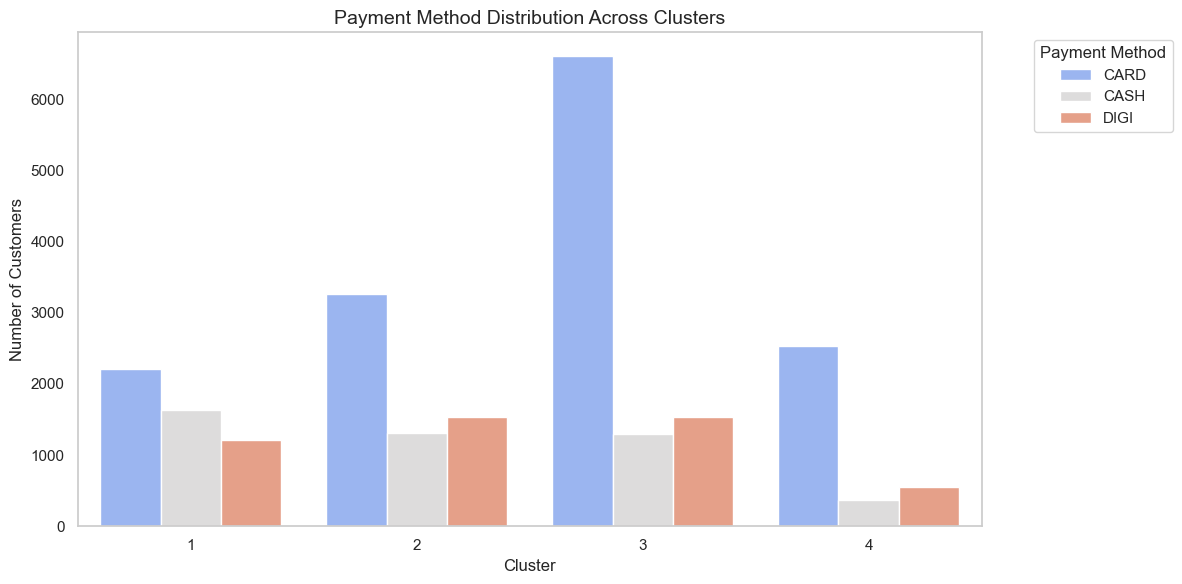

In [21]:
# Define a function to create barplots for category distributions
def sns_category_distribution(df, category_column, cluster_column, title):
    """
    Creates a seaborn barplot for category distribution across clusters.

    Parameters:
        df (DataFrame): The input DataFrame containing clusters and category columns.
        category_column (str): The name of the column representing the category (e.g., 'last_promo').
        cluster_column (str): The name of the column representing clusters (e.g., 'cluster').
        title (str): Title of the plot.

    Returns:
        None
    """

    sns.set_style("whitegrid", {'axes.grid' : False})

    # Aggregate data
    aggregated_data = df.groupby([cluster_column, category_column]).size().reset_index(name='Count')
    
    # Create a color palette dynamically
    palette = sns.color_palette("coolwarm", n_colors=df[category_column].nunique())
    
    # Create the barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=aggregated_data, x=cluster_column, y='Count', hue=category_column, palette=palette)
    
    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.legend(title=category_column.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Use the function for Last Promotion
sns_category_distribution(df_economic, 'last_promo', 'cluster', 'Last Promotion Distribution Across Clusters')

# Use the function for Payment Method
sns_category_distribution(df_economic, 'payment_method', 'cluster', 'Payment Method Distribution Across Clusters')


## Promotions

In [22]:
# Group by 'cluster' and 'last_promo', then count occurrences
promotion_counts = df_economic.groupby(['cluster', 'last_promo']).size().reset_index(name='Count')

# Display the counts
print(promotion_counts)


    cluster last_promo  Count
0         1          -   1704
1         1   DELIVERY   1755
2         1   DISCOUNT    973
3         1    FREEBIE    628
4         2          -   2761
5         2   DELIVERY   1585
6         2   DISCOUNT    899
7         2    FREEBIE    860
8         3          -   5441
9         3   DELIVERY   1412
10        3   DISCOUNT   1236
11        3    FREEBIE   1353
12        4          -   2110
13        4   DELIVERY    446
14        4   DISCOUNT    424
15        4    FREEBIE    466


## Payment Method

In [23]:
# Group by 'cluster' and 'last_promo', then count occurrences
payment_counts = df_economic.groupby(['cluster', 'payment_method']).size().reset_index(name='Count')

# Display the counts
print(payment_counts)

    cluster payment_method  Count
0         1           CARD   2208
1         1           CASH   1633
2         1           DIGI   1219
3         2           CARD   3267
4         2           CASH   1306
5         2           DIGI   1532
6         3           CARD   6612
7         3           CASH   1290
8         3           DIGI   1540
9         4           CARD   2533
10        4           CASH    365
11        4           DIGI    548


## Cuisines preferences

In [24]:
# Define cuisine categories
asian_cuisines = ['CUI_Asian_spend_segment', 'CUI_Indian_spend_segment', 
                  'CUI_Japanese_spend_segment', 'CUI_Noodle Dishes_spend_segment', 'CUI_Chinese_spend_segment']

western_cuisines = ['CUI_American_spend_segment', 'CUI_Italian_spend_segment']

snack_cuisines = ['CUI_Beverages_spend_segment', 'CUI_Cafe_spend_segment', 'CUI_Desserts_spend_segment']

other_cuisines = ['CUI_Chicken Dishes_spend_segment', 'CUI_Healthy_spend_segment', 'CUI_OTHER_spend_segment']



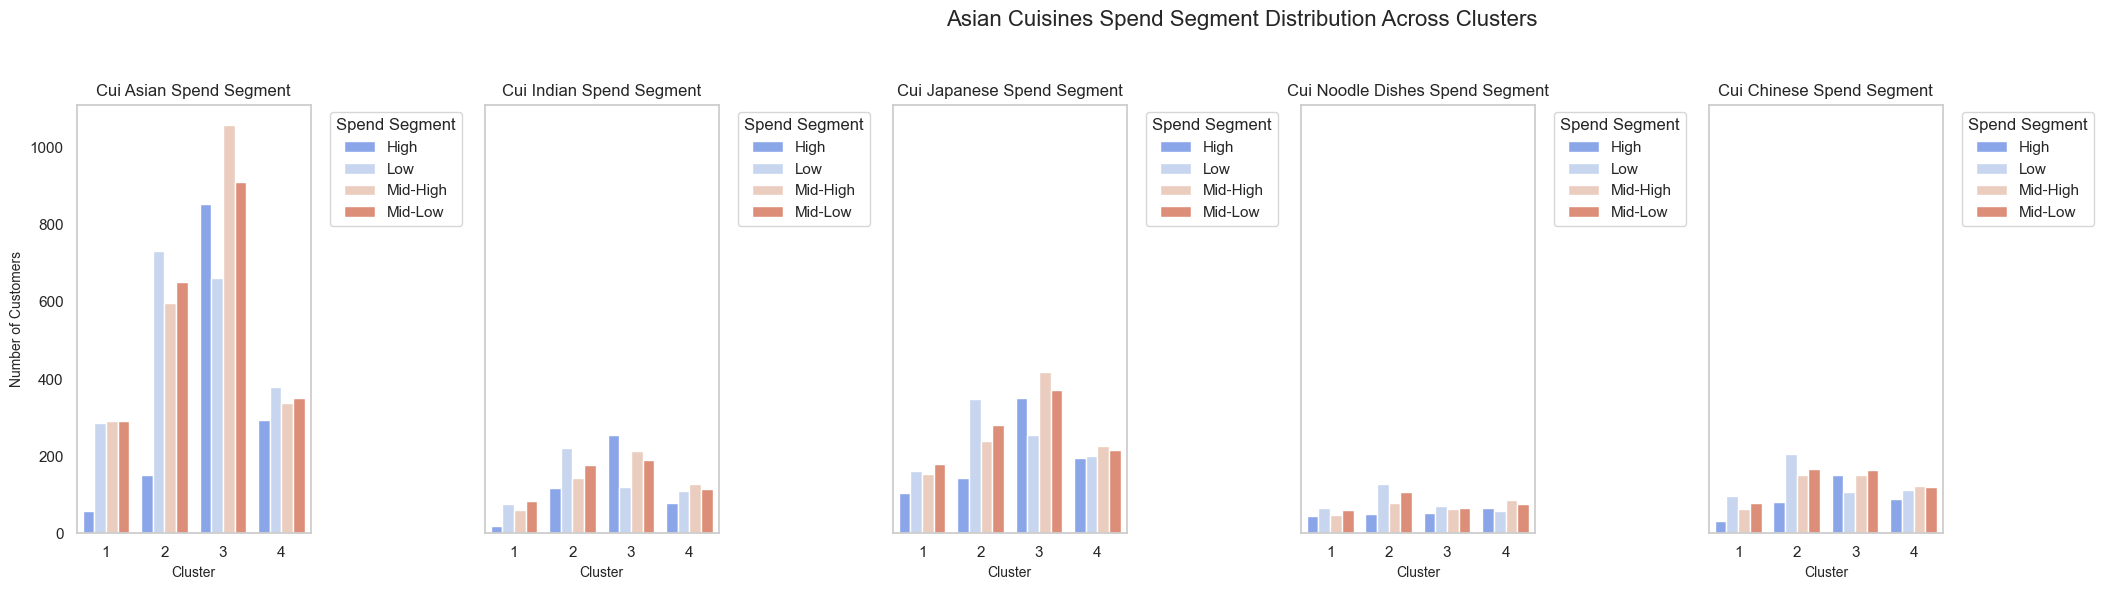

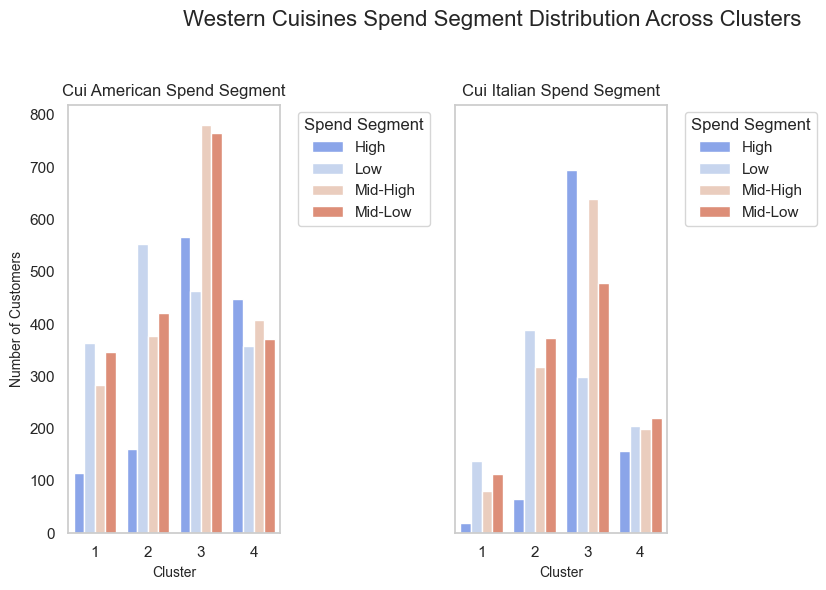

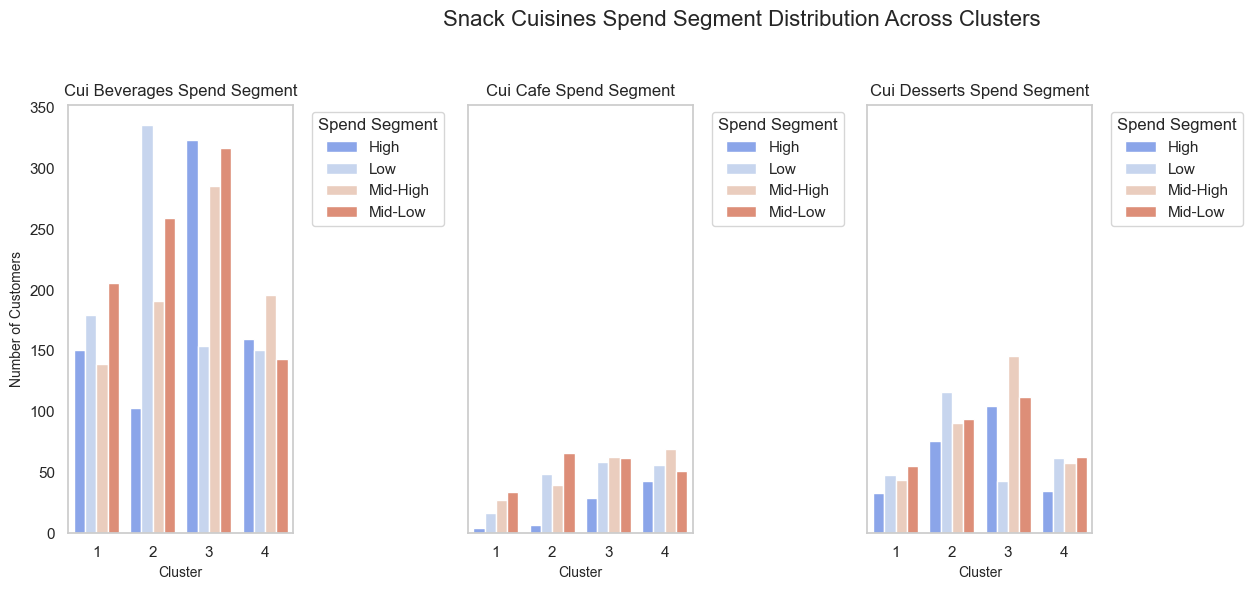

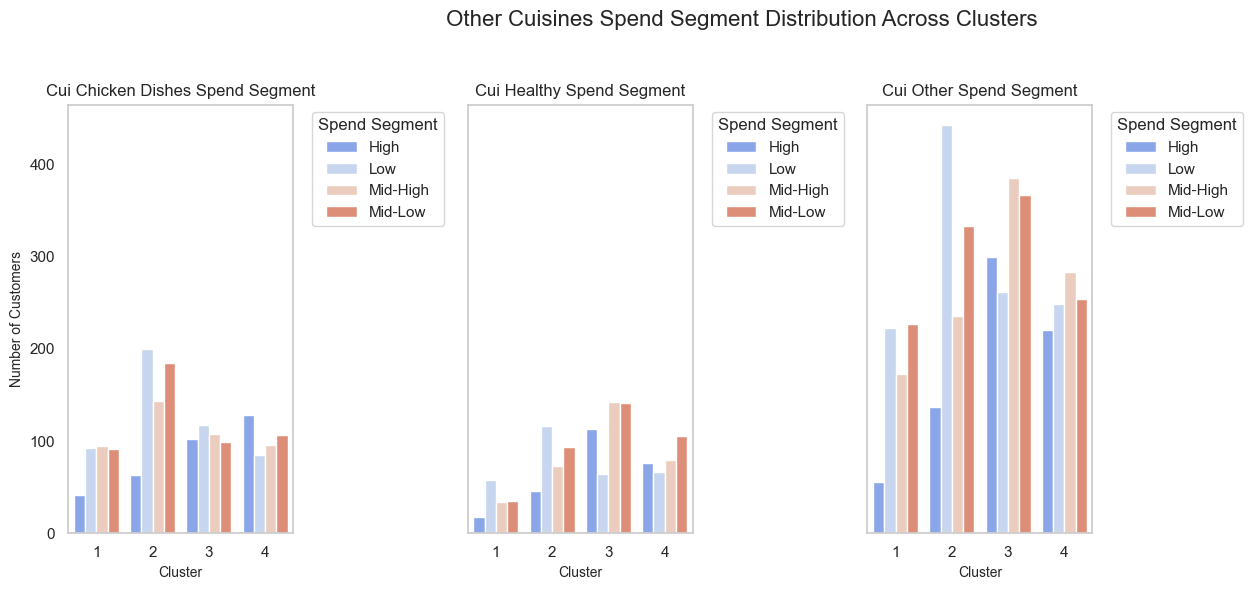

In [25]:
# Modified function to exclude 'None' categories
def plot_cuisine_categories_exclude_none(df, cuisine_list, title):
    """
    Creates barplots for the given cuisine categories grouped by cluster, excluding 'None' categories.

    Parameters:
        df (DataFrame): The input DataFrame.
        cuisine_list (list): List of cuisine columns to plot.
        title (str): Title of the overall figure.
    """
    n_cuisines = len(cuisine_list)
    fig, axes = plt.subplots(1, n_cuisines, figsize=(5 * n_cuisines, 6), sharey=True)
    fig.suptitle(title, fontsize=16)
    
    for i, cuisine in enumerate(cuisine_list):
        # Aggregate data and exclude 'None'
        aggregated_data = df[df[cuisine] != 'None'].groupby(['cluster', cuisine]).size().reset_index(name='Count')
        
        # Create a barplot
        sns.barplot(data=aggregated_data, x='cluster', y='Count', hue=cuisine, ax=axes[i], palette="coolwarm")
        axes[i].set_title(cuisine.replace('_', ' ').title(), fontsize=12)
        axes[i].set_xlabel('Cluster', fontsize=10)
        axes[i].set_ylabel('Number of Customers', fontsize=10)
        axes[i].legend(title='Spend Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
    plt.show()

# Plot for each category excluding 'None'
plot_cuisine_categories_exclude_none(df_economic, asian_cuisines, 'Asian Cuisines Spend Segment Distribution Across Clusters')
plot_cuisine_categories_exclude_none(df_economic, western_cuisines, 'Western Cuisines Spend Segment Distribution Across Clusters')
plot_cuisine_categories_exclude_none(df_economic, snack_cuisines, 'Snack Cuisines Spend Segment Distribution Across Clusters')
plot_cuisine_categories_exclude_none(df_economic, other_cuisines, 'Other Cuisines Spend Segment Distribution Across Clusters')



In [26]:
def calculate_corrected_cuisine_counts(df, cuisine_list):
    """
    Aggregates counts for each cuisine grouped by cluster and spend segment,
    while excluding 'None' values.

    Parameters:
        df (DataFrame): Input DataFrame.
        cuisine_list (list): List of cuisine columns.

    Returns:
        DataFrame: Aggregated counts with 'cluster' and 'Spend Segment'.
    """
    all_cuisine_counts = []
    for cuisine in cuisine_list:
        # Filter out 'None' and group by cluster and spend segment
        cuisine_data = (
            df[df[cuisine] != 'None']
            .groupby(['cluster', cuisine])
            .size()
            .reset_index(name='Count')
        )
        cuisine_data.rename(columns={cuisine: 'Spend Segment'}, inplace=True)
        cuisine_data['Cuisine'] = cuisine
        all_cuisine_counts.append(cuisine_data)
    return pd.concat(all_cuisine_counts, ignore_index=True)

# Calculate counts for all cuisines
corrected_cuisine_counts = calculate_corrected_cuisine_counts(df_economic, asian_cuisines)
western_counts = calculate_corrected_cuisine_counts(df_economic, western_cuisines)
snack_counts = calculate_corrected_cuisine_counts(df_economic, snack_cuisines)
other_counts = calculate_corrected_cuisine_counts(df_economic, other_cuisines)

# Pivot the data to show counts by Spend Segment for each cluster and cuisine
corrected_cuisine_counts_pivot = corrected_cuisine_counts.pivot_table(
    index=['cluster', 'Cuisine'],
    columns='Spend Segment',
    values='Count',
    fill_value=0
).reset_index()

western_pivot = western_counts.pivot_table(
    index=['cluster', 'Cuisine'],
    columns='Spend Segment',
    values='Count',
    fill_value=0
).reset_index()

snack_pivot = snack_counts.pivot_table(
    index=['cluster', 'Cuisine'],
    columns='Spend Segment',
    values='Count',
    fill_value=0
).reset_index()

other_pivot = other_counts.pivot_table(
    index=['cluster', 'Cuisine'],
    columns='Spend Segment',
    values='Count',
    fill_value=0
).reset_index()


In [27]:
corrected_cuisine_counts

,cluster,Spend Segment,Count,Cuisine
0,1,High,57,CUI_Asian_spend_segment
1,1,Low,285,CUI_Asian_spend_segment
2,1,Mid-High,292,CUI_Asian_spend_segment
3,1,Mid-Low,290,CUI_Asian_spend_segment
4,2,High,152,CUI_Asian_spend_segment
5,2,Low,733,CUI_Asian_spend_segment
6,2,Mid-High,596,CUI_Asian_spend_segment
7,2,Mid-Low,651,CUI_Asian_spend_segment
8,3,High,855,CUI_Asian_spend_segment
9,3,Low,663,CUI_Asian_spend_segment


In [28]:
western_pivot

Spend Segment,cluster,Cuisine,High,Low,Mid-High,Mid-Low
0,1,CUI_American_spend_segment,115.0,363.0,284.0,347.0
1,1,CUI_Italian_spend_segment,19.0,139.0,80.0,114.0
2,2,CUI_American_spend_segment,162.0,553.0,378.0,421.0
3,2,CUI_Italian_spend_segment,66.0,389.0,318.0,373.0
4,3,CUI_American_spend_segment,566.0,463.0,781.0,766.0
5,3,CUI_Italian_spend_segment,694.0,298.0,639.0,479.0
6,4,CUI_American_spend_segment,449.0,358.0,407.0,371.0
7,4,CUI_Italian_spend_segment,158.0,205.0,200.0,221.0


In [29]:
snack_pivot

Spend Segment,cluster,Cuisine,High,Low,Mid-High,Mid-Low
0,1,CUI_Beverages_spend_segment,151.0,180.0,139.0,206.0
1,1,CUI_Cafe_spend_segment,4.0,17.0,27.0,34.0
2,1,CUI_Desserts_spend_segment,33.0,48.0,44.0,55.0
3,2,CUI_Beverages_spend_segment,103.0,336.0,191.0,259.0
4,2,CUI_Cafe_spend_segment,7.0,49.0,40.0,66.0
5,2,CUI_Desserts_spend_segment,76.0,116.0,91.0,94.0
6,3,CUI_Beverages_spend_segment,324.0,154.0,286.0,317.0
7,3,CUI_Cafe_spend_segment,29.0,59.0,63.0,62.0
8,3,CUI_Desserts_spend_segment,105.0,43.0,146.0,112.0
9,4,CUI_Beverages_spend_segment,160.0,151.0,196.0,143.0


In [30]:
other_pivot

Spend Segment,cluster,Cuisine,High,Low,Mid-High,Mid-Low
0,1,CUI_Chicken Dishes_spend_segment,42.0,92.0,95.0,91.0
1,1,CUI_Healthy_spend_segment,18.0,58.0,34.0,35.0
2,1,CUI_OTHER_spend_segment,56.0,223.0,173.0,227.0
3,2,CUI_Chicken Dishes_spend_segment,63.0,200.0,144.0,185.0
4,2,CUI_Healthy_spend_segment,46.0,116.0,73.0,94.0
5,2,CUI_OTHER_spend_segment,137.0,443.0,236.0,333.0
6,3,CUI_Chicken Dishes_spend_segment,102.0,117.0,108.0,99.0
7,3,CUI_Healthy_spend_segment,113.0,64.0,142.0,141.0
8,3,CUI_OTHER_spend_segment,300.0,262.0,385.0,367.0
9,4,CUI_Chicken Dishes_spend_segment,128.0,85.0,96.0,107.0


## Bar Plot of each Cuisine by cluster

Note: This part was done with the help of chatgpt in order to automate and save some time, doing the plots , in which the most important thing in our perspective is the right interpretation.

In [31]:
# Define categories (cuisines)
categories = [
    "CUI_Asian", "CUI_Indian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_Chinese",
    "CUI_American", "CUI_Italian", "CUI_Beverages", "CUI_Cafe", "CUI_Desserts",
    "CUI_Chicken Dishes", "CUI_Healthy", "CUI_OTHER"
]

# Total customers data by cluster
clusters = {
    "Cluster 1": [18, 4, 11, 4, 5, 21, 7, 13, 1.6, 3.5, 6.3, 2.8, 13.4],
    "Cluster 2": [35, 10.8, 16.5, 5.9, 10, 25, 18.7, 14.5, 2.5, 6.1, 10, 5.3, 18.8],
    "Cluster 3": [36.9, 8.24, 14.79, 2.67, 6.1, 27.2, 22.8, 11.45, 2.26, 4.3, 4.51, 4.87, 13.92],
    "Cluster 4": [39.55, 12.54, 24.35, 8.27, 12.83, 46, 22.75, 18.88, 6.36, 6.33, 12.07, 9.46, 29.19],
}

# High + Mid-High spenders percentages
cluster_sizes = {1: 5060, 2: 6105, 3: 9442, 4: 3446}
high_mid_high_counts = {
    1: [57 + 292, 20 + 60, 105 + 154, 44 + 48, 31 + 62, 115 + 284, 19 + 80, 151 + 139, 4 + 27, 33 + 44, 42 + 95, 18 + 34, 56 + 173],
    2: [152 + 596, 117 + 144, 144 + 239, 51 + 79, 80 + 150, 162 + 378, 66 + 318, 103 + 191, 7 + 40, 76 + 91, 63 + 144, 46 + 73, 137 + 236],
    3: [855 + 1059, 254 + 214, 352 + 418, 53 + 63, 151 + 152, 566 + 781, 694 + 639, 324 + 286, 29 + 63, 105 + 146, 102 + 108, 113 + 142, 300 + 385],
    4: [295 + 339, 79 + 128, 196 + 225, 66 + 85, 88 + 122, 449 + 407, 158 + 200, 160 + 196, 43 + 69, 35 + 58, 128 + 96, 76 + 79, 220 + 283],
}
high_mid_high_percentages = {cluster: [count / cluster_sizes[cluster] * 100 for count in counts]
                             for cluster, counts in high_mid_high_counts.items()}

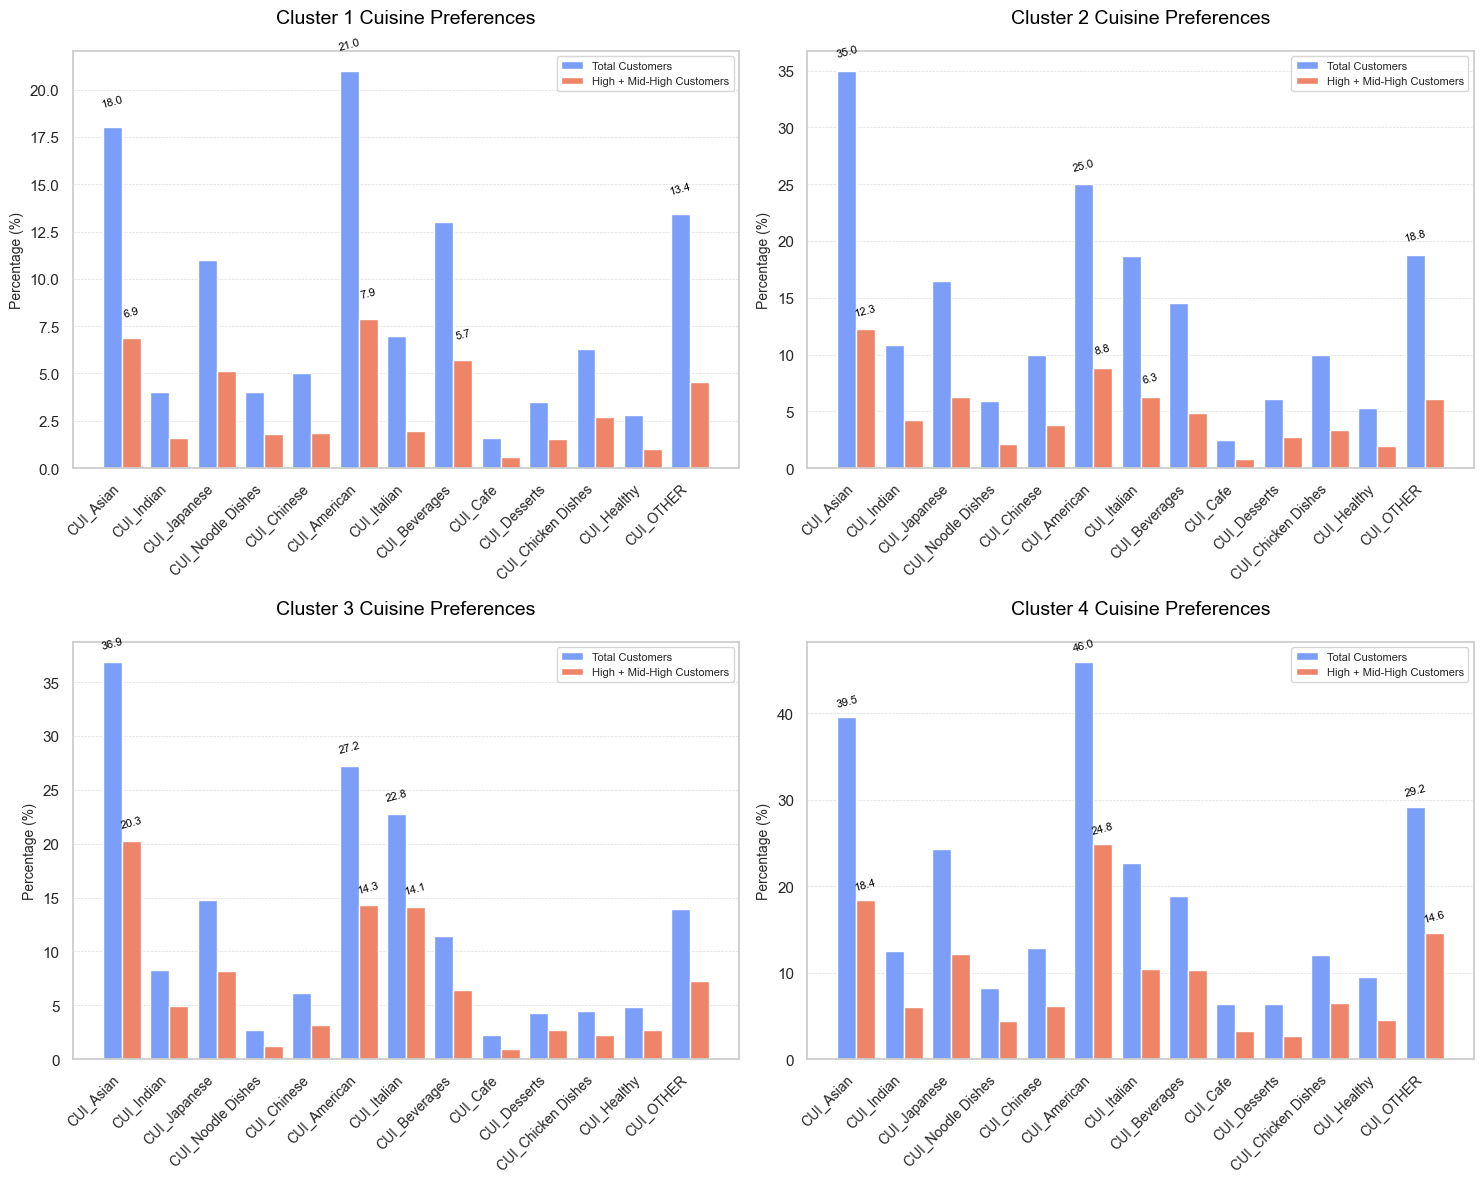

In [32]:
from matplotlib.cm import get_cmap

sns.set_style("whitegrid", {'axes.grid': False})

# Create bar plots with coolwarm colors to compare total customers and high + mid-high spenders for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define coolwarm color palette
colors = get_cmap('coolwarm')
color1 = colors(0.2)  # Cool color
color2 = colors(0.8)  # Warm color

# Iterate over clusters to create individual bar plots
for idx, (cluster_name, total_values) in enumerate(clusters.items()):
    ax = axes.flatten()[idx]

    # Bar positions
    x_positions = np.arange(len(categories))

    # Trim and align data
    total_values = total_values[:len(categories)]
    high_mid_high_values = high_mid_high_percentages[idx + 1][:len(categories)]

    # Plot total customers bar
    bars_total = ax.bar(x_positions - 0.2, total_values, width=0.4, label="Total Customers", color=color1)

    # Plot high + mid-high spenders bar
    bars_high = ax.bar(x_positions + 0.2, high_mid_high_values, width=0.4, label="High + Mid-High Customers", color=color2)

    # Set labels and title
    ax.set_xticks(x_positions)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
    ax.set_title(f"{cluster_name} Cuisine Preferences", fontsize=14, pad=20, color='black')
    ax.set_ylabel("Percentage (%)", fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    # Add labels on top of bars for top 3 cuisines
    top_3_indices_total = sorted(range(len(total_values)), key=lambda i: total_values[i], reverse=True)[:3]
    top_3_indices_high = sorted(range(len(high_mid_high_values)), key=lambda i: high_mid_high_values[i], reverse=True)[:3]

    for i in top_3_indices_total:
        ax.text(x_positions[i] - 0.2, total_values[i] + 1, f"{total_values[i]:.1f}", ha='center', va='bottom', fontsize=8, color='black' , rotation = 15)

    for i in top_3_indices_high:
        ax.text(x_positions[i] + 0.2, high_mid_high_values[i] + 1, f"{high_mid_high_values[i]:.1f}", ha='center', va='bottom', fontsize=8, color='black' , rotation = 15)

# Adjust layout
plt.tight_layout()
plt.show()


# Day of the Week and Hour Analysis

In [33]:
df_economic.columns

Index(['customer_region', 'last_promo', 'payment_method',
       'CUI_American_spend_segment', 'CUI_Asian_spend_segment',
       'CUI_Beverages_spend_segment', 'CUI_Cafe_spend_segment',
       'CUI_Chicken Dishes_spend_segment', 'CUI_Chinese_spend_segment',
       'CUI_Desserts_spend_segment', 'CUI_Healthy_spend_segment',
       'CUI_Indian_spend_segment', 'CUI_Italian_spend_segment',
       'CUI_Japanese_spend_segment', 'CUI_Noodle Dishes_spend_segment',
       'CUI_OTHER_spend_segment', 'CUI_Street Food / Snacks_spend_segment',
       'CUI_Thai_spend_segment', 'spender_segment', 'age_group', 'DOW_0',
       'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'customer_age',
       'is_chain', 'first_order', 'last_order', 'total_spent', 'order_range',
       'cuisine_variety', 'total_orders', 'Early_Morning', 'Breakfast',
       'Lunch', 'Snack', 'Dinner', 'Late_Night', 'products_per_orders',
       'chain_per_orders', 'vendor_per_orders', 'cuisine_per_orders',
       'spent_per_ord

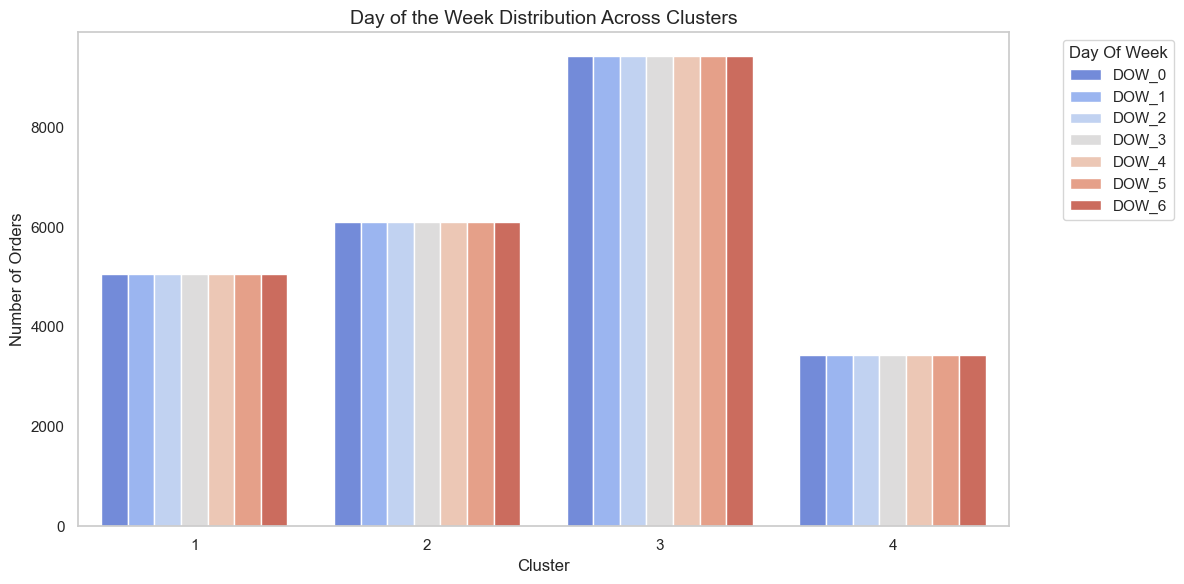

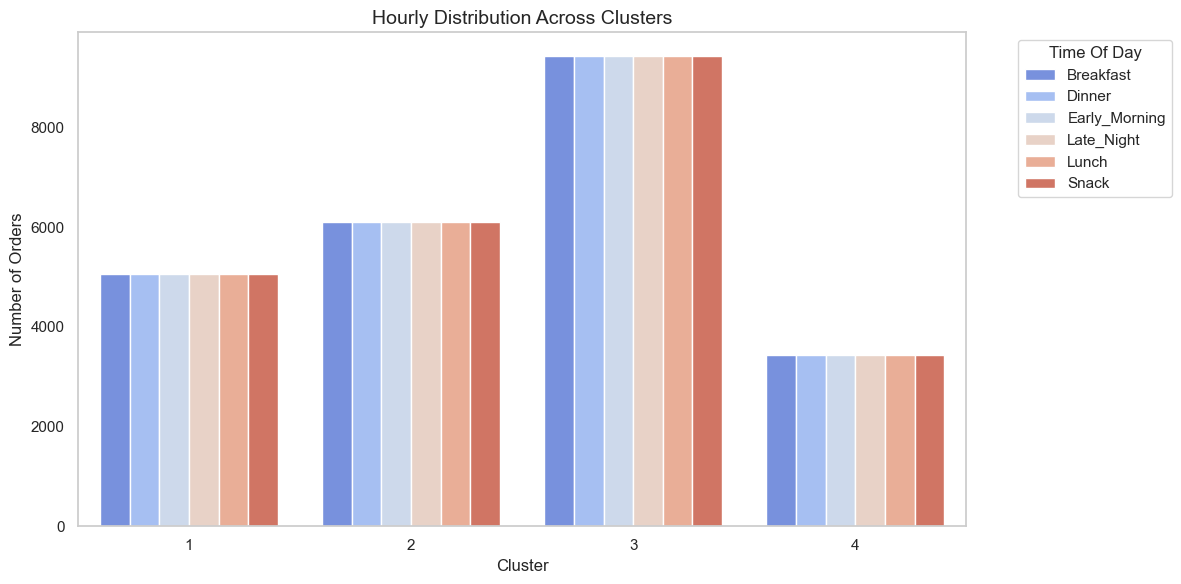

In [34]:
def sns_category_distribution(df, category_column, cluster_column, title):
    """
    Creates a seaborn barplot for category distribution across clusters.

    Parameters:
        df (DataFrame): The input DataFrame containing clusters and category columns.
        category_column (str): The name of the column representing the category (e.g., 'last_promo').
        cluster_column (str): The name of the column representing clusters (e.g., 'cluster').
        title (str): Title of the plot.

    Returns:
        None
    """

    sns.set_style("whitegrid", {'axes.grid': False})

    # Aggregate data
    aggregated_data = df.groupby([cluster_column, category_column]).size().reset_index(name='Count')

    # Create a color palette dynamically
    palette = sns.color_palette("coolwarm", n_colors=df[category_column].nunique())

    # Create the barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=aggregated_data, x=cluster_column, y='Count', hue=category_column, palette=palette)

    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Number of Orders', fontsize=12)
    plt.legend(title=category_column.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage
# Plot day-of-week distribution
sns_category_distribution(df_economic.melt(id_vars=['cluster'], value_vars=['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'], 
                                           var_name='day_of_week', value_name='Count'), 
                          'day_of_week', 'cluster', 'Day of the Week Distribution Across Clusters')

# Plot hourly distribution
sns_category_distribution(df_economic.melt(id_vars=['cluster'], value_vars=['Early_Morning', 'Breakfast', 'Lunch', 'Snack', 'Dinner', 'Late_Night'], 
                                           var_name='time_of_day', value_name='Count'), 
                          'time_of_day', 'cluster', 'Hourly Distribution Across Clusters')


## 1.3. Perspective 3 : Demographic Segmentation (Before merging clusters)

Note: We decided it to leave it out of our report because we considered that interpreting 3 perspectives was a lot, and also because the majority of clusters have the same age distribution, having young adults as the most represented group, and also as we do not have the location of restaurants, from a business point of view, it's pointless in using the ZIP Code as we can't do cross checking with the restaurants locations to extract meaningful conclusions. Nonetheless, we decided to keep the analysis of age group and zip code in the notebook, as these variables could provide valuable insights for the management or marketing team in a real-world project.

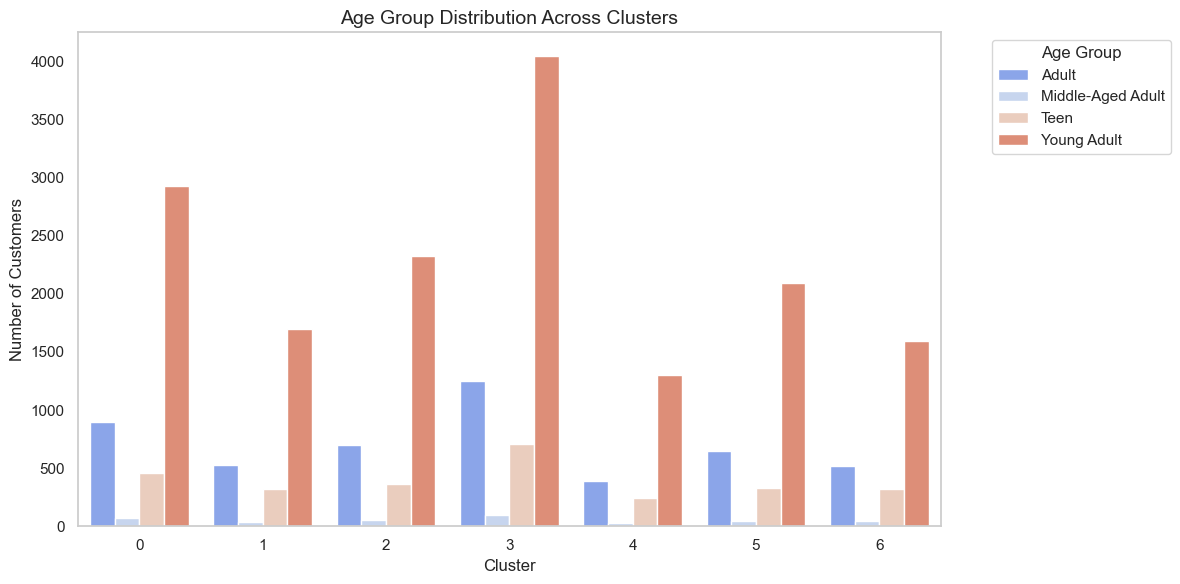

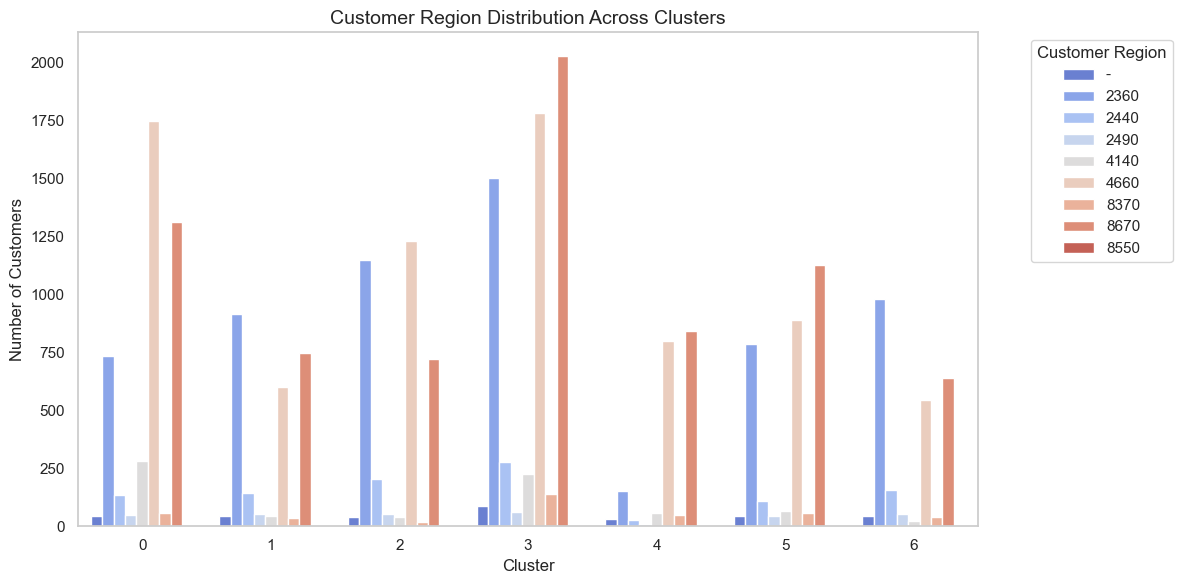

In [35]:
demographic_features = ['age_group', 'customer_region']


# Create a palette for each feature
palettes = {feature: sns.color_palette("coolwarm", n_colors=len(df[feature].unique())) for feature in demographic_features}

# Loop through demographic features and create barplots
for feature in demographic_features:
    # Aggregate data by cluster and feature
    aggregated_data = df.groupby(['cluster', feature]).size().reset_index(name='Count')
    
    # Create the barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=aggregated_data, x='cluster', y='Count', hue=feature, palette=palettes[feature])
    
    # Customize the plot
    plt.title(f'{feature.replace("_", " ").title()} Distribution Across Clusters', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.legend(title=feature.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



## Age Group

Cluster 0 and Cluster 3:

Both clusters have a dominant proportion of Young Adults, making them similar in demographic composition.

Cluster 1, Cluster 4, and Cluster 6:

These clusters also show a strong representation of Young Adults, but with slightly more diversity (some representation of Adults and Teens).

Cluster 2 and 5: Again , high number of young adults but with lower nr of customers.

## Customer Region

Cluster 3 has 50% of the distribution splitted across 8670 and 4660 regions.

Cluster 0 is almost the same as cluster 3 but has a highly relative amount of 2360 region customers.

Cluster 6 dominates has a highly relative amount of customers from 4660 region.

Cluster 2 and 5 have the same distribution having 8670 , 4660 and 2440 has the most frequent regions.